 # GRIP: The Sparks Foundation
 
**Data Science And Business Analytics Internship**  

**Name : Harsh Wani**  

**Task 1: Prediction using Supervised ML**  
 

**Predict the percentage of an student based on the no. of study hours**

In [7]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reding the data**

In [9]:
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data=pd.read_csv(url)

**Exploring the data**

In [12]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [14]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


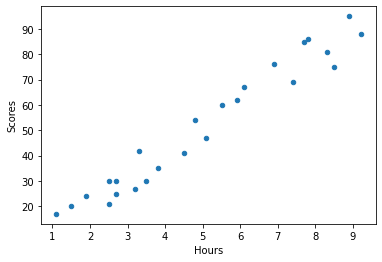

In [17]:
data.plot(kind='scatter',x='Hours',y='Scores');
plt.show()

In [18]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [19]:
hours=data['Hours']
scores=data['Scores']

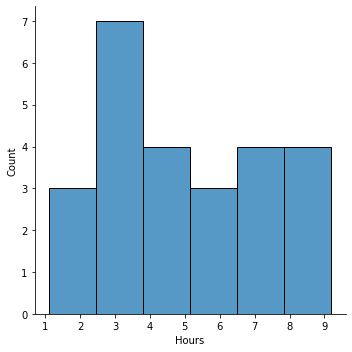

In [26]:
sns.displot(hours)

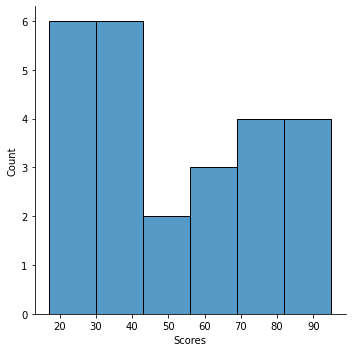

In [27]:
sns.displot(scores)

**Linear Regression**

In [38]:
X= data.iloc[:, :-1].values
y= data.iloc[:,1].values

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=50)

In [42]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

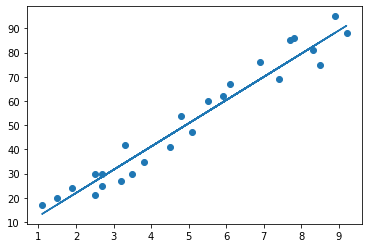

In [43]:
m=reg.coef_
c=reg.intercept_
line=m*X+c
plt.scatter(X,y)
plt.plot(X,line);
plt.show()


In [44]:
y_pred=reg.predict(X_test)

In [45]:
actual_predicted=pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


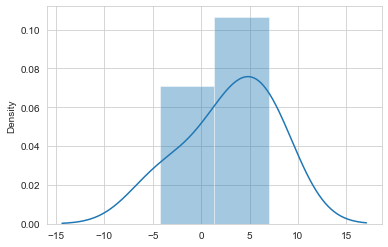

In [46]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [48]:
v=9.25
s=reg.predict([[v]])
print(s)

[91.56986604]


In [50]:
print("So if a student studies for 9.25 hours a day then he/she gets",s,"% marks in the exam")

So if a student studies for 9.25 hours a day then he/she gets [91.56986604] % marks in the exam


**Model Evaluation**

In [51]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [52]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.5916495300630285


In [53]:
print('R2 score:',r2_score(y_test,y_pred))

R2 score: 0.971014141329942
